# Thinking
Thinking1	逻辑回归的假设条件是怎样的？<br/>
            答：逻辑回归的假设条件是：1.数据服从伯努利分布 2.正类的概率由sigmoid函数计算<br/>
Thinking2	逻辑回归的损失函数是怎样的？<br/>
            答：损失函数为，是基于最大似然估计推导得到的
            
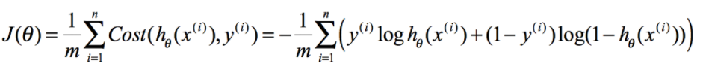

Thinking3	逻辑回归如何进行分类？<br/>
            答：设定一个阈值，判断该样本正类概率是否大于改阈值，大于则为正，否则为负类样本，通常阈值会设定为0.5。<br/>
Thinking4	为什么在训练中需要将高度相关的特征去掉？
            答：因为相关度高的特征具有相互可替代性，去掉其中一个不仅能够简化数据提高可解释性，也能提高训练速度。

# Action 
1.计算各个属性的iv值，根据iv值是否大于0.1决定是否留下该属性</br>
2.讲原先样本中的上述留下的属性分别替换为其woe编码</br>
3.利用编码好的数据进行线性回归，并判断模型效果

In [1]:
import pandas as pd
df_train=pd.read_csv('G://python_lesson//score_card//score_card//cs-training.csv')

In [2]:
df_train=df_train.iloc[:,1:]

In [3]:
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
df_train['SeriousDlqin2yrs'].value_counts()#SeriousDlqin2yrs该字段标记是否违约
df_train['SeriousDlqin2yrs'].sum()/len(df_train)#违约比例

0.06684

In [6]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

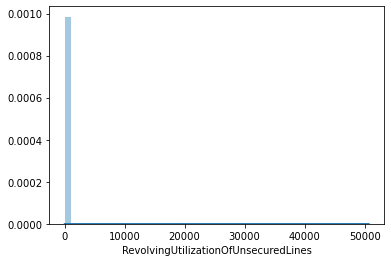

In [8]:
import seaborn as sns
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [9]:
df_train.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [10]:
df_train.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [11]:
#用中位数填充缺失值
df_train=df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [12]:
df_train['age'].value_counts()

49     3837
48     3806
50     3753
63     3719
47     3719
       ... 
101       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64

In [13]:
#数据分箱
#split age/NumberOfDependents to 6 bins
import math
age_bins=[-math.inf,25,40,50,60,70,math.inf]
df_train['bin_age']=pd.cut(df_train['age'],bins=age_bins)
df_train[['age','bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [14]:
dependent_bins=[-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents']=pd.cut(df_train['NumberOfDependents'],bins=dependent_bins)
df_train[['NumberOfDependents','bin_NumberOfDependents']]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [15]:
#split NumberOfTime30-59DaysPastDueNotWorse/NumberOfTimes90DaysLate/NumberOfTime60-89DaysPastDueNotWorse into 10 bins
dpd_bins=[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse']=pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate']=pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse']=pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],bins=dpd_bins)
df_train[['NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','bin_NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse']]

,NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,bin_NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse
0,2,"(1.0, 2.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
1,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
2,1,"(-inf, 1.0]",1,"(-inf, 1.0]",0,"(-inf, 1.0]"
3,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
4,1,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
...,...,...,...,...,...,...
149995,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149996,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149997,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149998,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"


In [16]:
#split RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines into 5 bins
df_train['bin_RevolvingUtilizationOfUnsecuredLines']=pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop')
df_train['bin_DebtRatio']=pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop')
df_train['bin_MonthlyIncome']=pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans']=pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop')
#df_train['bin_NumberRealEstateLoansOrLines']=pd.qcut(df_train['NumberRealEstateLoansOrLines',q=5,duplicates='drop'])
loans_bins=[-math.inf,0,1,2,3,math.inf]
df_train['bin_NumberRealEstateLoansOrLines']=pd.cut(df_train['NumberRealEstateLoansOrLines'],bins=loans_bins)
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]"


In [17]:
df_train['bin_NumberRealEstateLoansOrLines'].value_counts()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [18]:
bin_cols=[c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [19]:
import numpy as np
def cal_IV(df,feature,target):
    lst=[]
    cols=['Variable','Value','All','Bad']
    for i in range(df[feature].nunique()):
        val=list(df[feature].unique())[i]
        lst.append([feature,val,df[df[feature]==val].count()[feature],df[(df[feature]==val)& (df[target]==1)].count()[feature]])
    #print(lst)
    data=pd.DataFrame(lst,columns=cols)
    data=data[data['Bad']>0]
    
    data['Share']=data['All']/data['All'].sum()
    data['Bad Rate']=data['Bad']/data['All']
    data['Margin Bad']=data['Bad']/data['Bad'].sum()
    data['Margin Good']=(data['All']-data['Bad'])/(data['All'].sum()-data['Bad'].sum())
    data['woe']=np.log( data['Margin Bad']/data['Margin Good'])
    data['iv']=((data['Margin Bad']-data['Margin Good'])*data['woe']).sum()
    data=data.sort_values(by=['Variable','Value'])
    return data['iv'].values[0]
   # print(data)
cal_IV(df_train,'bin_age','SeriousDlqin2yrs')

0.24041120302785982

In [20]:
#计算每个字段的iv
for f in bin_cols:
    #print(f)
    print(f,cal_IV(df_train,f,'SeriousDlqin2yrs'))

bin_age 0.24041120302785982
bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.06167337290177645


In [21]:
#iv>0.1的字段
'''
bin_NumberOfTime30-59DaysPastDueNotWorse
bin_NumberOfTimes90DaysLate
bin_NumberOfTime60-89DaysPastDueNotWorse
bin_age
bin_RevolvingUtilizationOfUnsecuredLines
'''
feature_cols=['bin_NumberOfTime30-59DaysPastDueNotWorse',
'bin_NumberOfTimes90DaysLate',
'bin_NumberOfTime60-89DaysPastDueNotWorse',
'bin_age',
'bin_RevolvingUtilizationOfUnsecuredLines']
feature_cols

['bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_age',
 'bin_RevolvingUtilizationOfUnsecuredLines']

In [22]:
def cal_WOE(df,features,target):
    df_new=df.copy()
    for f in features:
        df_woe=df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns=list(map(''.join,df_woe.columns.values))
        df_woe=df_woe.reset_index()
        df_woe=df_woe.rename(columns={target+'sum':'bad',target+'count':'all'})
        #return df_woe
        df_woe['good']=df_woe['all']-df_woe['bad']
        df_woe['margin bad']=df_woe['bad']/df_woe['bad'].sum()
        df_woe['margin good']=df_woe['good']/df_woe['good'].sum()
        df_woe['woe']=np.log1p(df_woe['margin bad']/df_woe['margin good'])#log1p可以避免分母为0的情况
        df_woe.columns=[c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new=df_new.merge(df_woe,on=f,how='left')
    return df_new
df_woe=cal_WOE(df_train,bin_cols,'SeriousDlqin2yrs')
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184121,0.184591,0.691873,419,3652,3233,0.041791,0.023097,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.156892,0.178405,0.630962,4672,56188,51516,0.465988,0.368040,0.818076
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.201177,0.251082,0.588475,2748,52338,49590,0.274087,0.354280,0.573037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,25838,0.184121,0.184591,0.691873,2748,52338,49590,0.274087,0.354280,0.573037
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076


In [23]:
feature_cols=['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'age',
 'RevolvingUtilizationOfUnsecuredLines']

In [24]:

df_bin_to_woe=pd.DataFrame(columns=['features','bin','woe'])
for f in feature_cols:
    #print(f)
    b='bin_'+f
    w='woe_bin_'+f
    df=df_woe[[w,b]].drop_duplicates()
    df.columns=['woe','bin']
    df['features']=f
    df_bin_to_woe=pd.concat([df_bin_to_woe,df])
df_bin_to_woe

,features,bin,woe
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.520613
251,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",2.774776
423,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",2.902860
1052,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",2.812612
6909,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",2.024184
10822,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",2.077007


In [25]:
#woe_cols=[c for c in list(df_woe.columns.values) if 'woe' in c]
#woe_cols
feature_cols
woe_cols=['woe_bin_'+c for c in feature_cols]
woe_cols  

['woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_age',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines']

In [26]:
#逻辑回归
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],test_size=0.2,random_state=33)


In [27]:
x_train

,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTime60-89DaysPastDueNotWorse,woe_bin_age,woe_bin_RevolvingUtilizationOfUnsecuredLines
106833,0.572521,0.608707,0.645352,0.813822,0.243890
126865,0.572521,0.608707,0.645352,0.955231,0.243890
21011,0.572521,0.608707,0.645352,0.406848,0.243890
31844,0.572521,0.608707,0.645352,0.406848,0.211221
133133,0.572521,0.608707,0.645352,0.955231,1.495914
...,...,...,...,...,...
34877,0.572521,0.608707,0.645352,0.955231,1.495914
147558,1.797837,0.608707,0.645352,0.813822,0.720083
75971,0.572521,0.608707,0.645352,0.279404,0.211221
131650,0.572521,0.608707,0.645352,0.813822,0.350952


In [28]:
from sklearn.metrics import accuracy_score,roc_auc_score
#from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=33).fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(roc_auc_score(y_pred,y_test))


0.9364333333333333
0.7787691092695656


In [29]:
#PDO=50 B=72.13
#WHEN 0dds=1,P0=650=>A=650
A=650
B=72.13
def generate_scorecard(model_coef,binning_df,features,B):
    lst=[]
    cols=['Variable','Binning','Score']
    coef=model_coef[0]
   # print(coef)
    for i in range(len(features)):
        f=features[i]
        #print(f)
        df=binning_df[binning_df['features']==f]
        #print(df)
        for index,row in df.iterrows():
            score=int(round(-coef[i]*row['woe']*B))
            lst.append([f,row['bin'],score])
    data=pd.DataFrame(lst,columns=cols)
    return data

score_card=generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B)

In [48]:
score_card

,Variable,Binning,Score
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-114
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-36
2,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-136
3,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-153
4,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",-159
5,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",-175
6,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",-183
7,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",-178
8,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",-128
9,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",-131


In [30]:
sorted_scorecard=score_card.groupby('Variable').apply(lambda x:x.sort_values('Score',ascending=False))

In [49]:
sorted_scorecard

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 1   NumberOfTime30-59DaysPastDueNotWorse   
                                     0   NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     2   NumberOfTime30-59DaysPastDueNotWorse   
                                     3   NumberOfTime30-59DaysPastDueNotWorse   
                                     4   NumberOfTime30-59DaysPastDueNotWorse   
                                     5   NumberOfTime30-59DaysPastDueNotWorse   
                                     7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 29  NumberOfTime60-89DaysPastDueNotWorse   
                                     20  NumberOfTime60-89DaysPastDueNotWorse   
                                     28  NumberOfTime60-89DaysPastDueNotWorse   
                                     21  NumberOfTime60-89DaysPastDueNotWorse   
                                     24  NumberOfTime60-89DaysPastDueNotWorse   
                                     27  NumberOfTime60-89DaysPastDueNotWorse   
                                     23  NumberOfTime60-89DaysPastDueNotWorse   
                                     22  NumberOfTime60-89DaysPastDueNotWorse   
                                     25  NumberOfTime60-89DaysPastDueNotWorse   
                                     26  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              10               NumberOfTimes90DaysLate   
                                     12               NumberOfTimes90DaysLate   
                                     15               NumberOfTimes90DaysLate   
                                     11               NumberOfTimes90DaysLate   
                                     17               NumberOfTimes90DaysLate   
                                     13               NumberOfTimes90DaysLate   
                                     14               NumberOfTimes90DaysLate   
                                     19               NumberOfTimes90DaysLate   
                                     16               NumberOfTimes90DaysLate   
                                     18               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 40  RevolvingUtilizationOfUnsecuredLines   
                                     39  RevolvingUtilizationOfUnsecuredLines   
                                     38  RevolvingUtilizationOfUnsecuredLines   
                                     37  RevolvingUtilizationOfUnsecuredLines   
                                     36  RevolvingUtilizationOfUnsecuredLines   
age                                  32                                   age   
                                     34                                   age   
                                     33                                   age   
                                     30                                   age   
                                     31                                   age   
                                     35                                   age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 1        (-inf, 1.0]    -36  
                                     0         (1.0, 2.0]   -114  
                                     8         (7.0, 8.0]   -128  
                                     9         (8.0, 9.0]   -131  
                                     2         (2.0, 3.0]   -136  
                                     3         (3.0, 4.0]   -153  
                                     4         (4

In [52]:

global null
null=''
def str_to_int(s):
    if s=='-inf':
        return -999999
    if s=='inf':
        return 999999
    return float(s)


def map_value_to_bin(feature_value,feature_to_bin):
    for index,row in feature_to_bin.iterrows():
        bins=str(row['Binning'])
        left_open=bins[0]=='('
        right_open=bins[-1]==')'
        binnings=bins[1:-1].split(',')
        in_range=True
        if left_open:
            if feature_value<=str_to_int(binnings[0]):
                in_range=False
        else:
            if feature_value<str_to_int(binnings[0]):
                in_range=False  
        if right_open:
            if feature_value>=str_to_int(binnings[1]):
                in_range=False
        else:
            if feature_value>str_to_int(binnings[1]):
                in_range=False       
        if in_range:
            return row['Binning']
    return null
                
def map_to_score(df,score_card):
    scored_columns=list(score_card['Variable'].unique())
    score=0
    #print(df)
    #print(scored_columns)
    for col in scored_columns:
        #print(col)
        feature_to_bin=score_card[score_card['Variable']==col] 
        feature_value=df[col]
        #print(feature_value)
        selected_bin=map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard=feature_to_bin[feature_to_bin['Binning']==selected_bin]
        score=score+selected_record_in_scorecard['Score'].iloc[0]
    return score

def caculate_score_with_card(df,score_card,A):
   # print(df)
    df['score']=df.apply(map_to_score,args=(score_card,),axis=1)
    df['score']+=A
    df['score']=df['score'].astype(int)
    return df

In [53]:
good_sample=df_train[df_train['SeriousDlqin2yrs']==0].sample(5)

good_sample=good_sample[feature_cols]
#print(good_sample)
caculate_score_with_card(good_sample,score_card,A)

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,age,RevolvingUtilizationOfUnsecuredLines,score
30729,0,0,1,89,0.177942,503
42924,0,0,0,26,0.048695,463
20214,0,0,0,61,0.292984,454
76843,0,0,0,81,1.000000,384
42250,1,0,0,47,0.716602,341


In [ ]:
score_card

In [ ]:
df_bin_to_woe


NameError: name 'pd' is not defined